In [ ]:
import keras, os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import Sequential
from keras.layers.merge import concatenate
from tensorflow.keras import datasets, layers, models, losses
from keras.layers import Input, Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D, GlobalAveragePooling2D ,AveragePooling2D, Dropout, Activation, BatchNormalization

# **Data augmentation**

In [ ]:
TRAINING_DIR = ""

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


VALIDATION_DIR = ""
validation_datagen = ImageDataGenerator(rescale = 1./255)



train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

# **AlexNet**

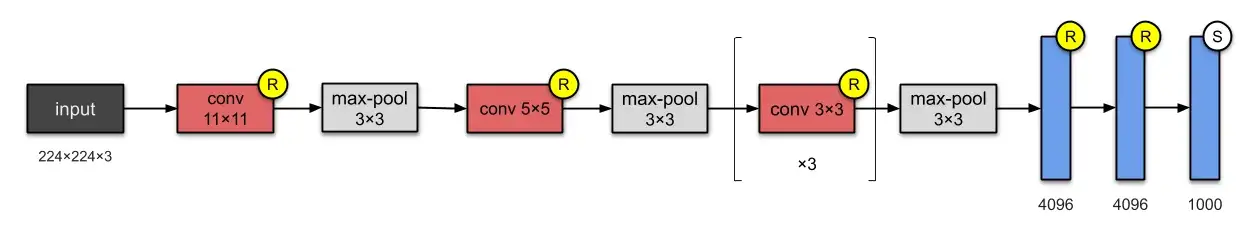

In [ ]:
def AlexNet_model(in_shape,num_classes):
  model = models.Sequential()

  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=in_shape))

  model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))

  model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))

  model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
  model.add(layers.Activation('relu'))

  model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
  model.add(layers.Activation('relu'))

  model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(num_classes, activation='softmax'))
  return model

# **VGG-16**

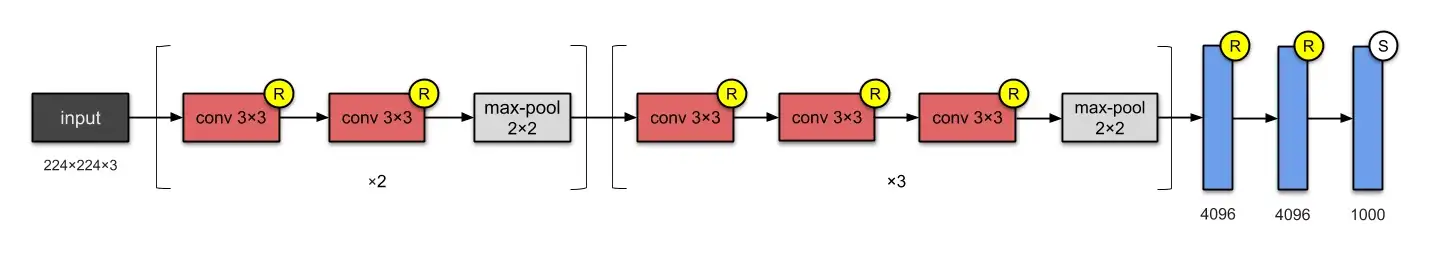

In [ ]:
def VGG16_model(in_shape,num_classes):
  model = models.Sequential()

  model.add(Conv2D(input_shape=in_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dense(4096,activation="relu"))
  model.add(Dense(num_classes, activation='softmax'))   
  return model

# **Inception**

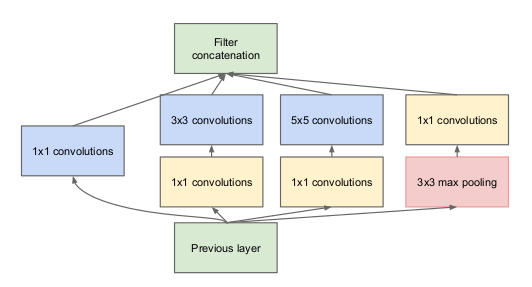

In [ ]:
def inception_model(in_shape,num_classes):
  
  filters_1x1=64
  filters_3x3_reduce=96
  filters_3x3=128
  filters_5x5_reduce=16
  filters_5x5=32
  filters_pool=32

  input_img = Input(shape = in_shape)
  
  conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
  
  conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

  conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

  pool = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  pool = Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(pool)

  output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool], axis=3)

  output = Flatten()(output)
  out    = Dense(num_classes, activation='softmax')(output)
  model = Model(inputs = input_img, outputs = out)
  return model

# **Inception-V3**

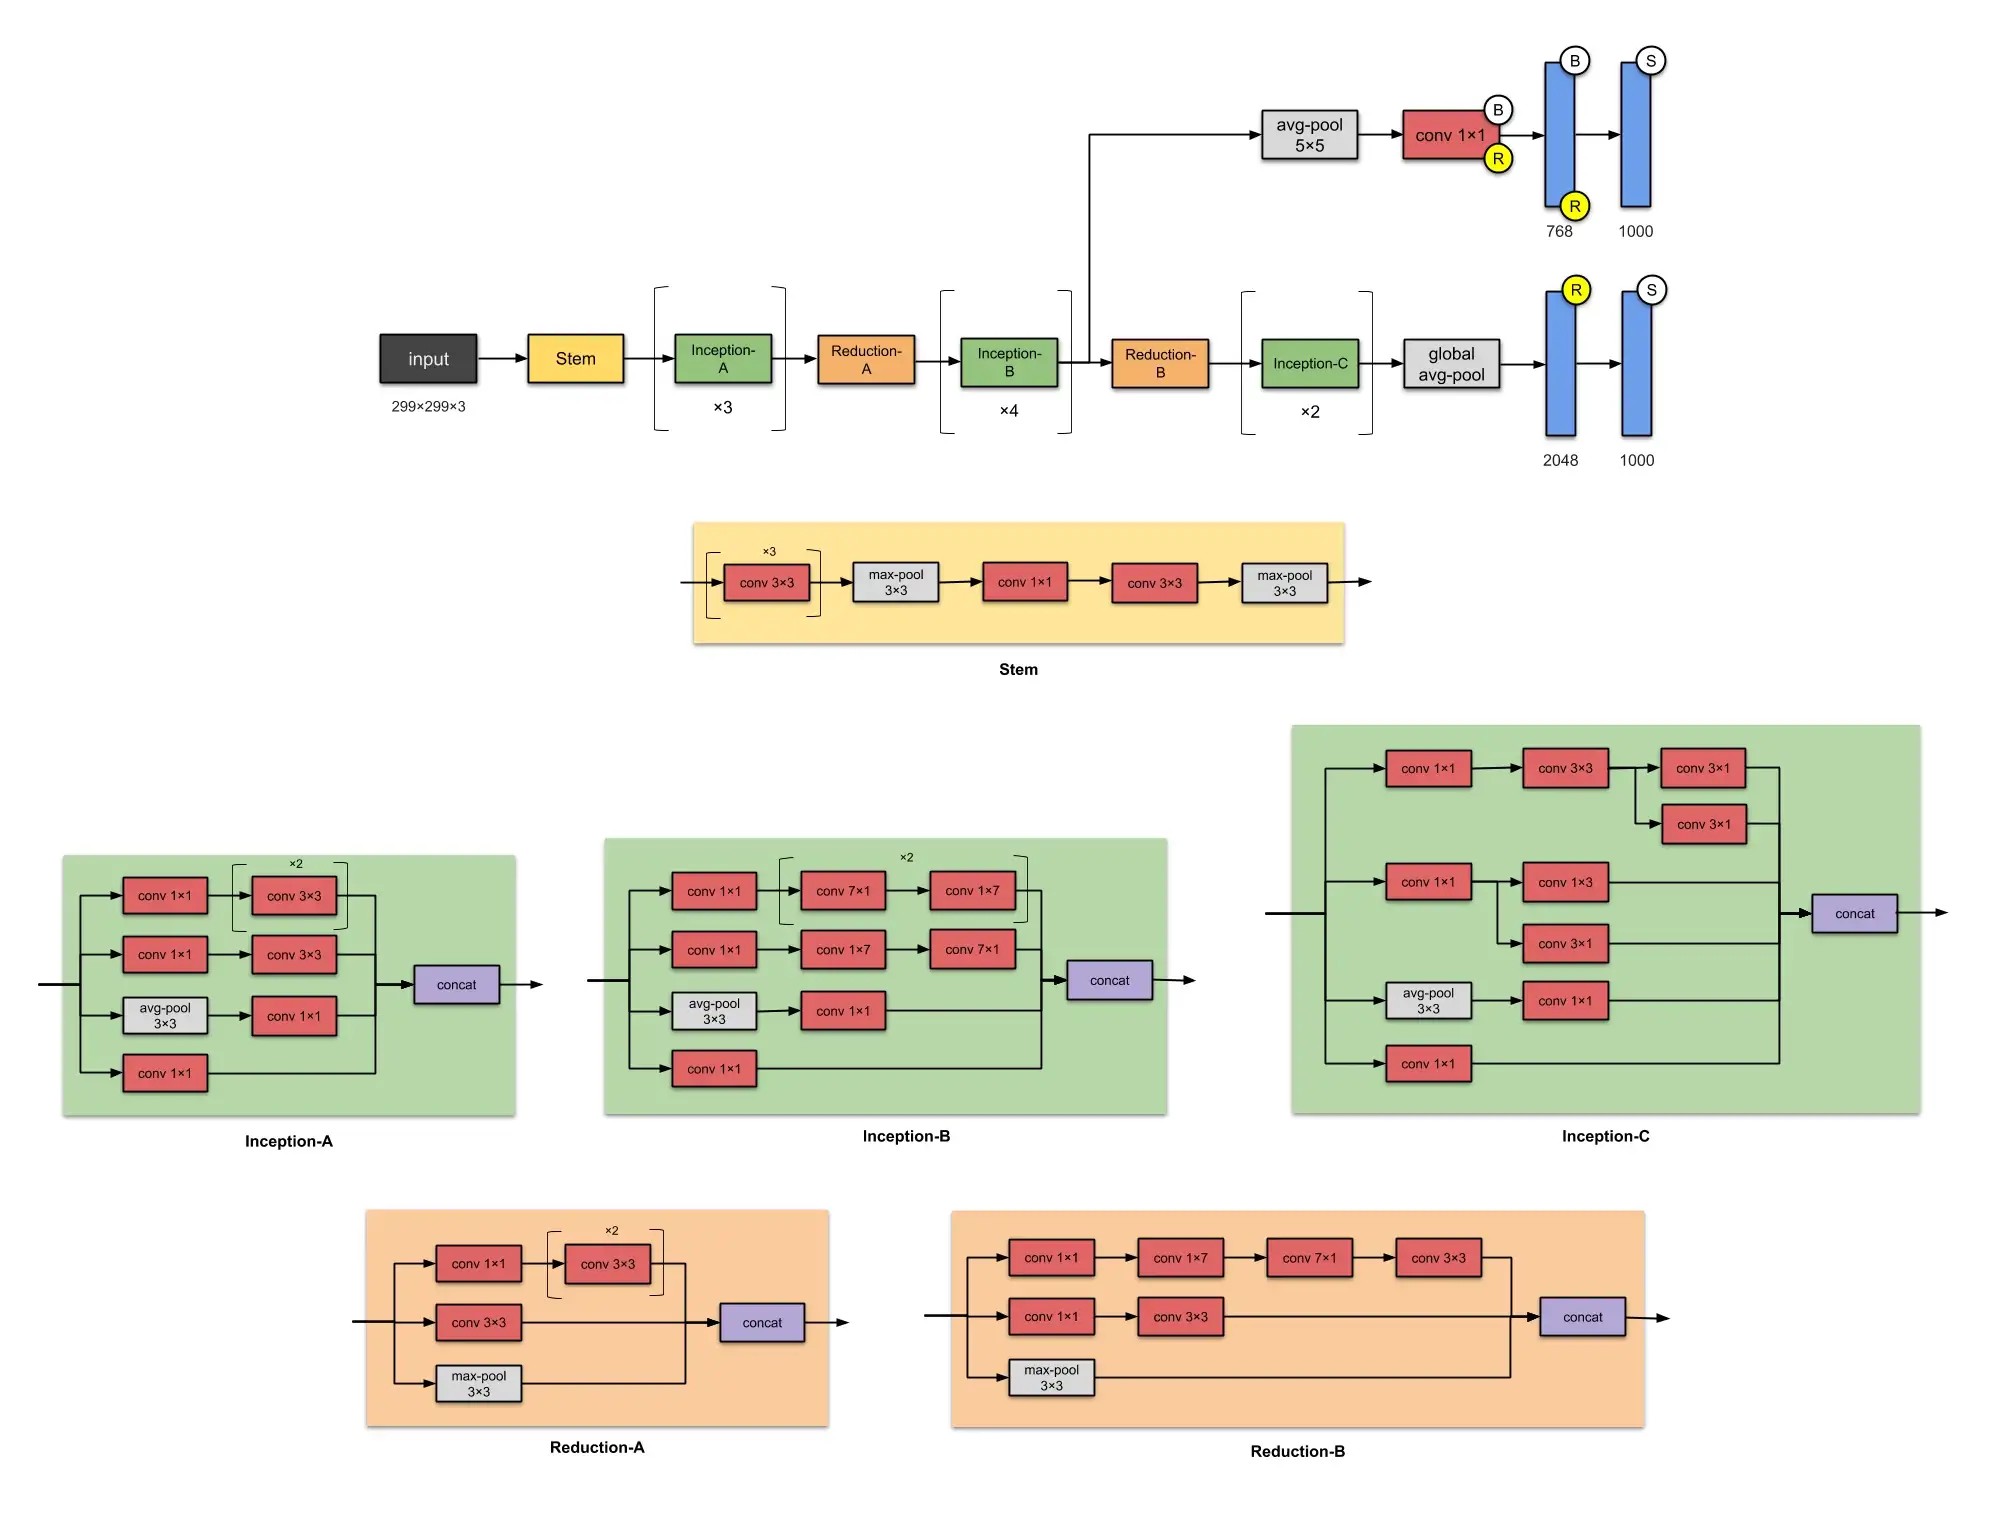

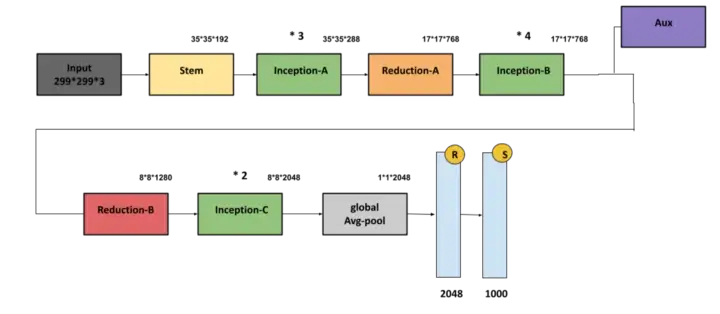

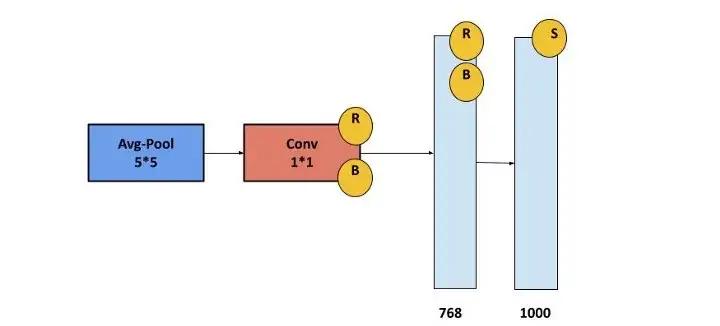


In [ ]:
def Convolutional_with_Batch_Normalisation(prev_layer , num_kernels , filter_Size , strides =(1,1) , padding = 'same'):
    x = Conv2D(filters=num_kernels, kernel_size = filter_Size, strides=strides , padding=padding)(prev_layer)
    x = BatchNormalization(axis=3)(x)
    x = Activation(activation='relu')(x)
    return x

In [ ]:
def Stem(prev_layer):
    x = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 32, filter_Size=(3,3) , strides=(2,2))
    x = Convolutional_with_Batch_Normalisation(x, num_kernels = 32, filter_Size=(3,3))
    x = Convolutional_with_Batch_Normalisation(x, num_kernels = 64, filter_Size=(3,3))
    x = MaxPool2D(pool_size=(3,3) , strides=(2,2)) (x)
    x = Convolutional_with_Batch_Normalisation(x, num_kernels = 80, filter_Size=(1,1))
    x = Convolutional_with_Batch_Normalisation(x, num_kernels = 192, filter_Size=(3,3))
    x = MaxPool2D(pool_size=(3,3) , strides=(2,2)) (x)
    return x  

In [ ]:
def Inception_A(prev_layer  , num_kernels):
    
    branch1 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 64, filter_Size = (1,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels=96, filter_Size=(3,3))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels=96, filter_Size=(3,3))
    
    branch2 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels=48, filter_Size=(1,1))
    branch2 = Convolutional_with_Batch_Normalisation(branch2, num_kernels=64, filter_Size=(3,3))
    
    branch3 = AveragePooling2D(pool_size=(3,3) , strides=(1,1) , padding='same') (prev_layer)
    branch3 = Convolutional_with_Batch_Normalisation(branch3, num_kernels = num_kernels, filter_Size = (1,1))
    
    branch4 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels=64, filter_Size=(1,1))
    
    output = concatenate([branch1 , branch2 , branch3 , branch4], axis=3)
    
    return output

In [ ]:
def Inception_B(prev_layer , num_kernels):
    
    branch1 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = num_kernels, filter_Size = (1,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = num_kernels, filter_Size = (7,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = num_kernels, filter_Size = (1,7))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = num_kernels, filter_Size = (7,1))    
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = 192, filter_Size = (1,7))
    
    branch2 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = num_kernels, filter_Size = (1,1))
    branch2 = Convolutional_with_Batch_Normalisation(branch2, num_kernels = num_kernels, filter_Size = (1,7))
    branch2 = Convolutional_with_Batch_Normalisation(branch2, num_kernels = 192, filter_Size = (7,1))
    
    branch3 = AveragePooling2D(pool_size=(3,3) , strides=(1,1) , padding ='same') (prev_layer)
    branch3 = Convolutional_with_Batch_Normalisation(branch3, num_kernels = 192, filter_Size = (1,1))
    
    branch4 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 192, filter_Size = (1,1))
    
    output = concatenate([branch1 , branch2 , branch3 , branch4], axis = 3)
    
    return output    

In [ ]:
def Inception_C(prev_layer):
    
    branch1 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 448, filter_Size = (1,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = 384, filter_Size = (3,3))
    branch1_1 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = 384, filter_Size = (1,3))    
    branch1_2 = Convolutional_with_Batch_Normalisation(branch1, num_kernels = 384, filter_Size = (3,1))
    branch1 = concatenate([branch1_1 , branch1_2], axis = 3)
    
    branch2 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 384, filter_Size = (1,1))
    branch2_1 = Convolutional_with_Batch_Normalisation(branch2, num_kernels = 384, filter_Size = (1,3))
    branch2_2 = Convolutional_with_Batch_Normalisation(branch2, num_kernels = 384, filter_Size = (3,1))
    branch2 = concatenate([branch2_1 , branch2_2], axis = 3)
    
    branch3 = AveragePooling2D(pool_size=(3,3) , strides=(1,1) , padding='same')(prev_layer)
    branch3 = Convolutional_with_Batch_Normalisation(branch3, num_kernels = 192, filter_Size = (1,1))
    
    branch4 = Convolutional_with_Batch_Normalisation(prev_layer, num_kernels = 320, filter_Size = (1,1))
    
    output = concatenate([branch1 , branch2 , branch3 , branch4], axis = 3)
    
    return output

In [ ]:
def Reduction_A(prev_layer):
    
    branch1 = Convolutional_with_Batch_Normalisation(prev_layer, nbr_kernels = 64, filter_Size = (1,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, nbr_kernels = 96, filter_Size = (3,3))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, nbr_kernels = 96, filter_Size = (3,3) , strides=(2,2))
    
    branch2 = Convolutional_with_Batch_Normalisation(prev_layer, nbr_kernels = 384, filter_Size=(3,3) , strides=(2,2))
    
    branch3 = MaxPool2D(pool_size=(3,3) , strides=(2,2) , padding='same')(prev_layer)
    
    output = concatenate([branch1 , branch2 , branch3], axis = 3)
    
    return output

In [ ]:
def Reduction_B(prev_layer):
    
    branch1 = Convolutional_with_Batch_Normalisation(prev_layer, nbr_kernels = 192, filter_Size = (1,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (1,7))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (7,1))
    branch1 = Convolutional_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (3,3) , strides=(2,2) , padding = 'valid')
    
    branch2 = Convolutional_with_Batch_Normalisation(prev_layer, nbr_kernels = 192, filter_Size = (1,1))
    branch2 = Convolutional_with_Batch_Normalisation(branch2, nbr_kernels = 320, filter_Size = (3,3) , strides=(2,2) , padding='valid')

    branch3 = MaxPool2D(pool_size=(3,3) , strides=(2,2) )(prev_layer)
    
    output = concatenate([branch1 , branch2 , branch3], axis = 3)
    
    return output

In [ ]:
def auxiliary_classifier(prev_Layer, num_classes):
    x = AveragePooling2D(pool_size=(5,5) , strides=(3,3)) (prev_Layer)
    x = Convolutional_with_Batch_Normalisation(x, nbr_kernels = 128, filter_Size = (1,1))
    x = Flatten()(x)
    x = Dense(units = 768, activation='relu') (x)
    x = Dropout(rate = 0.2) (x)
    x = Dense(units = num_classes, activation='softmax') (x)
    return x

In [ ]:
def InceptionV3(in_shape, num_classes):
    
    input_layer = Input(shape=in_shape)
    
    x = Stem(input_layer)
    
    x = Inception_A(prev_layer = x ,nbr_kernels = 32)
    x = Inception_A(prev_layer = x ,nbr_kernels = 64)
    x = Inception_A(prev_layer = x ,nbr_kernels = 64)
    
    x = Reduction_A(prev_layer = x )
    
    x = Inception_B(prev_layer = x  , nbr_kernels = 128)
    x = Inception_B(prev_layer = x , nbr_kernels = 160)
    x = Inception_B(prev_layer = x , nbr_kernels = 160)
    x = Inception_B(prev_layer = x , nbr_kernels = 192)
    
    Aux = auxiliary_classifier(prev_Layer = x)
    
    x = Reduction_B(prev_layer = x)
    
    x = Inception_C(prev_layer = x)
    x = Inception_C(prev_layer = x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(units=2048, activation='relu') (x)
    x = Dropout(rate = 0.2) (x)
    x = Dense(units=num_classes, activation='softmax') (x)
    
    model = Model(inputs = input_layer , outputs = [x , Aux])    
    return model

# **ResNet**

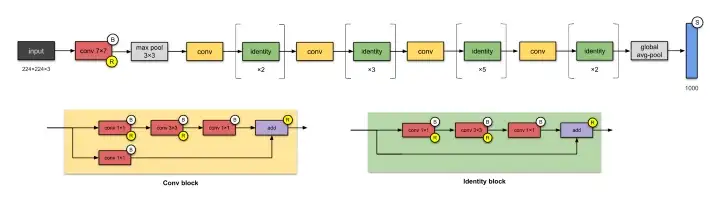

In [ ]:
def Convolutional_w_Batch_Normalisation(prev_layer , num_kernels , filter_Size , strides =(1,1) , padding = 'same', kernel_regularizer = l2(0.001)):
    x = Conv2D(filters=num_kernels, kernel_size = filter_Size, strides=strides , padding=padding, kernel_regularizer = kernel_regularizer)(prev_layer)
    x = BatchNormalization(axis=3)(x)
    x = Activation(activation='relu')(x)
    return x

def Convolutional_without_Activation(prev_layer , num_kernels , filter_Size , strides =(1,1) , padding = 'same', kernel_regularizer = l2(0.001)):
    x = Conv2D(filters=num_kernels, kernel_size = filter_Size, strides=strides , padding=padding, kernel_regularizer = kernel_regularizer)(prev_layer)
    x = BatchNormalization(axis=3)(x)
    return x

In [ ]:
def identityBlock(x, kernels): 
  x_skip = x 
  k1, k2 = kernels

  #first block 
  x = Convolutional_w_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(1, 1) , strides =(1,1) , padding = 'valid', kernel_regularizer=l2(0.001))

  #second block (bottleneck)
  x = Convolutional_w_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(3, 3) , strides =(1,1) , padding = 'same', kernel_regularizer=l2(0.001))

  # third block
  x = Convolutional_without_Activation(x , num_kernels = k2 , filter_Size = filter_Size=(1, 1) , strides =(1,1) , padding = 'valid', kernel_regularizer = l2(0.001))

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)
  return x

In [ ]:
def convBlock(x, s, kernels):
  x_skip = x
  k1, k2 = kernels

  # first block
  x = Convolutional_w_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(1, 1) , strides = (s, s) , padding = 'valid', kernel_regularizer=l2(0.001))

  # second block
  x = Convolutional_w_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(3, 3) , strides = (1, 1) , padding = 'same', kernel_regularizer=l2(0.001))

  #third block
  x = Convolutional_without_Activation(x ,num_kernels = k2 , filter_Size=(1, 1) , strides = (1, 1) , padding = 'valid', kernel_regularizer=l2(0.001))

  # shortcut 
  x_skip = Convolutional_without_Activation(x_skip ,num_kernels = k2 , filter_Size=(1, 1) , strides = (s, s) , padding = 'valid', kernel_regularizer=l2(0.001))

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def resnet50(in_shape, num_classes):

  input_im = Input(shape=in_shape)

  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  x = convBlock(x, s=1, kernels=(64, 256))
  x = identityBlock(x, kernels=(64, 256))
  x = identityBlock(x, kernels=(64, 256))

  # 3rd stage
  x = convBlock(x, s=2, kernels=(128, 512))
  x = identityBlock(x, kernels=(128, 512))
  x = identityBlock(x, kernels=(128, 512))
  x = identityBlock(x, kernels=(128, 512))

  # 4th stage
  x = convBlock(x, s=2, kernels=(256, 1024))
  x = identityBlock(x, kernels=(256, 1024))
  x = identityBlock(x, kernels=(256, 1024))
  x = identityBlock(x, kernels=(256, 1024))
  x = identityBlock(x, kernels=(256, 1024))
  x = identityBlock(x, kernels=(256, 1024))

  # 5th stage
  x = convBlock(x, s=2, kernels=(512, 2048))
  x = identityBlock(x, kernels=(512, 2048))
  x = identityBlock(x, kernels=(512, 2048))

  # ends with average pooling and dense connection
  x = AveragePooling2D((2, 2), padding='same')(x)  #we need try global also

  x = Flatten()(x)
  x = Dense(num_classes, activation='softmax')(x)

  # define the model 
  model = Model(inputs=input_im, outputs=x)
  return model

# **ResNeXt**

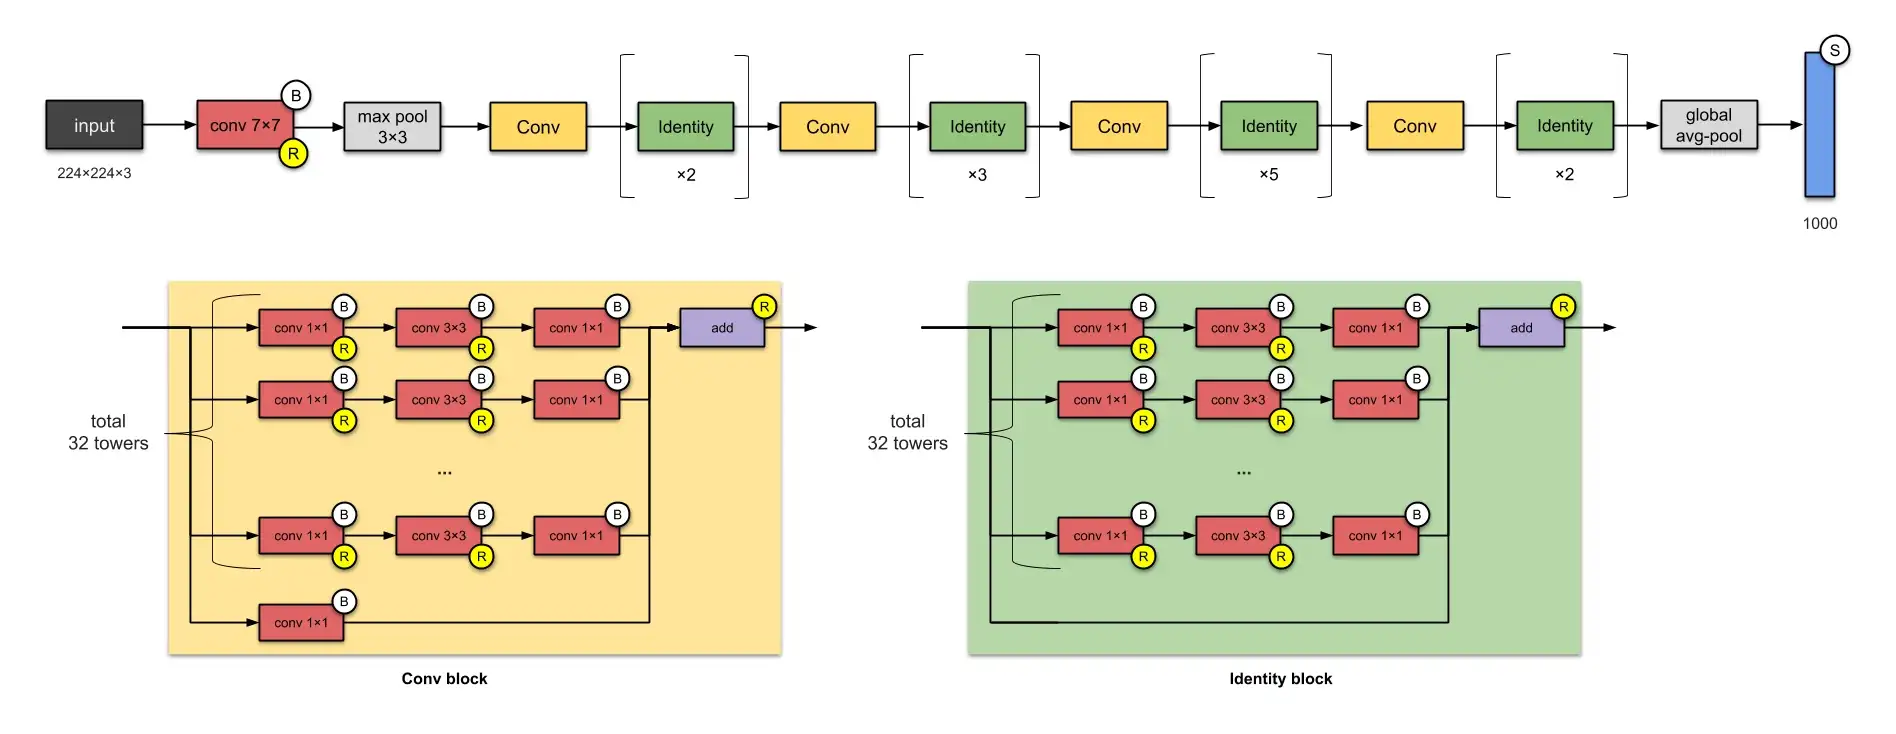

In [ ]:
def identityBlock_resnext(x, kernels): 
  x_skip = x 
  k1, k2 = kernels

  architecture = []

  for i in range(1,33):
    #first block 
    x = Convolutional_with_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(1, 1) , strides =(1,1) , padding = 'valid', kernel_regularizer=l2(0.001))

    #second block (bottleneck)
    x = Convolutional_with_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(3, 3) , strides =(1,1) , padding = 'same', kernel_regularizer=l2(0.001))

    # third block
    x = Convolutional_without_Activation(x , num_kernels = k2 , filter_Size = filter_Size=(1, 1) , strides =(1,1) , padding = 'valid', kernel_regularizer = l2(0.001))

    architecture.append(x)

  # add the input
  architecture.append(x_skip)

  x = Add()(architecture)
  x = Activation(activations.relu)(x)
  return x

In [ ]:
def convBlock_resnext(x, s, kernels):
  x_skip = x
  k1, k2 = kernels

  architecture = []

  for i in range(1,33):    
    # first block
    x = Convolutional_with_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(1, 1) , strides = (s, s) , padding = 'valid', kernel_regularizer=l2(0.001))

    # second block
    x = Convolutional_with_Batch_Normalisation(x ,num_kernels = k1 , filter_Size=(3, 3) , strides = (1, 1) , padding = 'same', kernel_regularizer=l2(0.001))

    #third block
    x = Convolutional_without_Activation(x ,num_kernels = k2 , filter_Size=(1, 1) , strides = (1, 1) , padding = 'valid', kernel_regularizer=l2(0.001))

    architecture.append(x)

  # shortcut 
  x_skip = Convolutional_without_Activation(x_skip ,num_kernels = k2 , filter_Size=(1, 1) , strides = (s, s) , padding = 'valid', kernel_regularizer=l2(0.001))

  # add 
  architecture.append(x_skip)

  x = Add()(architecture)
  x = Activation(activations.relu)(x)
  return x

In [ ]:
def resnext50(in_shape, num_classes):

  input_im = Input(shape=in_shape)

  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  x = convBlock_resnext(x, s=1, kernels=(64, 256))
  x = identityBlock_resnext(x, kernels=(64, 256))
  x = identityBlock_resnext(x, kernels=(64, 256))

  # 3rd stage
  x = convBlock_resnext(x, s=2, kernels=(128, 512))
  x = identityBlock_resnext(x, kernels=(128, 512))
  x = identityBlock_resnext(x, kernels=(128, 512))
  x = identityBlock_resnext(x, kernels=(128, 512))

  # 4th stage
  x = convBlock_resnext(x, s=2, kernels=(256, 1024))
  x = identityBlock_resnext(x, kernels=(256, 1024))
  x = identityBlock_resnext(x, kernels=(256, 1024))
  x = identityBlock_resnext(x, kernels=(256, 1024))
  x = identityBlock_resnext(x, kernels=(256, 1024))
  x = identityBlock_resnext(x, kernels=(256, 1024))

  # 5th stage
  x = convBlock_resnext(x, s=2, kernels=(512, 2048))
  x = identityBlock_resnext(x, kernels=(512, 2048))
  x = identityBlock_resnext(x, kernels=(512, 2048))

  # ends with average pooling and dense connection
  x = AveragePooling2D((2, 2), padding='same')(x)  #we need try global also

  x = Flatten()(x)
  x = Dense(num_classes, activation='softmax')(x)

  # define the model 
  model = Model(inputs=input_im, outputs=x)
  return model

# **History Ploting**

In [ ]:
def history_plot(history):
  fig, axs = plt.subplots(2, 1, figsize=(15,15))
  axs[0].plot(history.history['loss'])
  axs[0].plot(history.history['val_loss'])
  axs[0].title.set_text('Training Loss vs Validation Loss')
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Loss')
  axs[0].legend(['Train', 'Val'])

  axs[1].plot(history.history['accuracy'])
  axs[1].plot(history.history['val_accuracy'])
  axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend(['Train', 'Val'])

# **Training & Testing**

In [ ]:
model = AlexNet_model(in_shape,num_classes)
model.summary()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

In [ ]:
model = VGG16_model(in_shape,num_classes)
model.summary()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

In [ ]:
model = inception_model(in_shape,num_classes)
model.summary()

# from keras.optimizers import SGD
# epochs = 25
# lrate = 0.01
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

In [ ]:
model = InceptionV3(in_shape,num_classes)
model.summary()
model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

In [ ]:
model = resnet50(in_shape,num_classes)
model.summary()
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

In [ ]:
model = resnext50(in_shape,num_classes)
model.summary()
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator)
history_plot(history)

# **Save Model**

In [ ]:
from keras.models import model_from_json
import os
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(os.path.join(os.getcwd(), 'model.h5'))